# LINE CHARTS
So far, we have mostly been manipulating and working with data that are represented as tables.

In this mission, we will learn the basics of Data visualization, a discipline that focuses on the visual representation of data. As humans, our brains have evolved to develop powerful visual processing capabilities

Here, we will be working with a dataset from the United States Bureau of Labour Statistics (BLS). This department surveys and calculates the monthly unemployment rate.

The data has been stored as a CSV file from January 1948 to August 2016.

So, we will start-off by first readingthe csv file into pandas to explore the table representation of this data.

In [1]:
import pandas as pd
unrate = pd.read_csv("C:\\Users\\USER\\Videos\\Coding Videos\\my_datasets\\unrate.csv")

In [2]:
unrate

,DATE,VALUE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
...,...,...
819,2016-04-01,5.0
820,2016-05-01,4.7
821,2016-06-01,4.9
822,2016-07-01,4.9


In [3]:
unrate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 2 columns):
DATE     824 non-null object
VALUE    824 non-null float64
dtypes: float64(1), object(1)
memory usage: 13.0+ KB


An exploration of the data shows us that the Date data is represented as strings. Hence, we need to convert it to a datetime object.

But before then our column label is in a format i dont like. So, i will like to change the casee of my columns labels.

In [4]:
cols = ["date", "value"]
unrate.columns = cols

In [5]:
unrate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 2 columns):
date     824 non-null object
value    824 non-null float64
dtypes: float64(1), object(1)
memory usage: 13.0+ KB


In [6]:
#Now, we go ahead to convert data in our date column to datetime type.
unrate["date"] = pd.to_datetime(unrate["date"])

In [7]:
#explore to dataset again, to see if the change has taken effect
unrate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 2 columns):
date     824 non-null datetime64[ns]
value    824 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.0 KB


In [8]:
#Display the first 12 rows
unrate.head(12)

,date,value
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
5,1948-06-01,3.6
6,1948-07-01,3.6
7,1948-08-01,3.9
8,1948-09-01,3.8
9,1948-10-01,3.7


We see now that the dataset contains 2 columns:

- Date: Always the first of the month, which means the data of a previous month is usually collated on the first of the next month

- Value: The corresponding unemployment rate in percent.

If we explore the data in our dataset carefully, we can make the following observations:

- Monthly unemployment rate ranges from 3.4 and 4.0

- Unemployment rate was higher in the month of March and December

- Lowest unemployment was reached in the month of January.

- Fluctuations in the unemployment rate occurred through out the year, with some months experiencing a trending up of unemployment and others a trending down.

Instead of representing data using text like tablesdo, visual representations use visual objects like dots, shapes and lines on a grid. Plots are a category of visual representations that allow us to easily undestand the relationships between variables. In this particular exercise, because we want to compare unemployment trends, we will use line charts.

Line charts work best when there is a logical connection between adjacent points.

To create the line charts, we will use **matplotlib** library which allows us to:

- quickly create common plots using high level functions

- extensively tweak plots

- create new kinds of plots from ground up

The **pyplot** module provides high level interface for matplotlib that allows us to quickly create common data plots and perform common tweaks to them.

The pyplot module is commonly imported as plt from matplotlib

In [9]:
import matplotlib.pyplot as plt

plt.plot()
plt.show()

<Figure size 640x480 with 1 Axes>

In [10]:
first_twelve = unrate[0:12]
print(first_twelve)

         date  value
0  1948-01-01    3.4
1  1948-02-01    3.8
2  1948-03-01    4.0
3  1948-04-01    3.9
4  1948-05-01    3.5
5  1948-06-01    3.6
6  1948-07-01    3.6
7  1948-08-01    3.9
8  1948-09-01    3.8
9  1948-10-01    3.7
10 1948-11-01    3.8
11 1948-12-01    4.0


C:\Users\USER\Documents\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


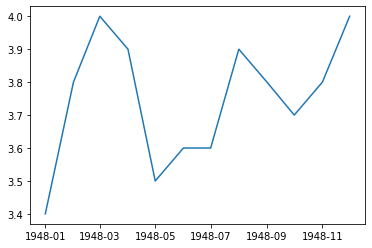

In [11]:
plt.plot(first_twelve["date"], first_twelve["value"])
plt.show()

The xticks( ) function within pyplot lets us to customize the behaviour of the x-axis ticks. We can specify degrees of rotation using float or integer value

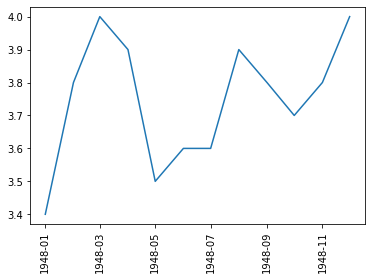

In [12]:
plt.plot(first_twelve["date"], first_twelve["value"])
plt.xticks(rotation = 90)
plt.show()


It is important to always add axis labels and title to your plot. Here is an overview of the pyplot functions we need to tweak the axis labels and the plot title.

- xlabel( ): accepts a string value,which sets the x- axis label.

- ylabel( ):  accepts a string value,which sets the y- axis label.

- tittle( ): accepts a string values, which is set as the plot title

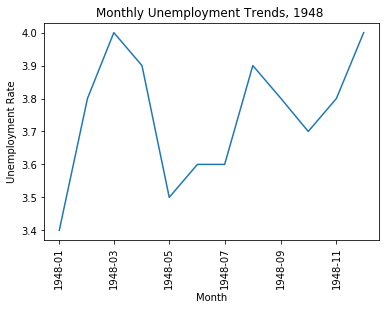

In [13]:
plt.plot(first_twelve["date"], first_twelve["value"])
plt.xticks(rotation = 90)
plt.xlabel("Month")
plt.ylabel("Unemployment Rate")
plt.title("Monthly Unemployment Trends, 1948 ")
plt.show()

Now, we have learned the basics of line charts and witnessed how a visual representation of the same data sample allowed us to surface the same observations quickly. We also learned basics of the pyplot module.

# MATPLOTLIB CLASSES

When we were working with a single plot, pyplot was storing and updating the state of that single plot. We could tweak the plot just using the functions in the pyplot module. When we want to work with multiple plots, however, we need to be more explicit about which plot we're making changes to. This means we need to understand the matplotlib classes that pyplot uses internally to maintain state so we can interarct with them directly.

Lets first start by understanding what pyplot was automatically storing under the hood when we create a single plot:

- a container for all plots was created (returned as a Figure object)

- a container for the plot was positioned on a grid (the plot returned as an Axes object)

- visual symbols were added to the plot (using the Axes methods)

A figure acts as a container for all of our plots and has methods for customizing the appearance and behaviour for the plots within that container. Some examples include changing the overall width and height of plotting area and the space between plots.

We can manually create a figure by calling pyplot.figure():
fig = plt.figure( ).

While plots are represented using instances of the Axes class, they're also often referred to as subplots in matplotlib.

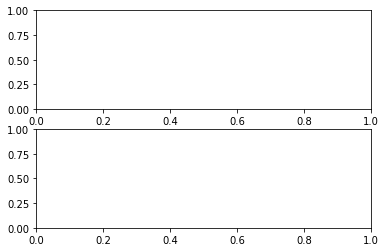

In [14]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
plt.show()

For each subplot , matplotlib generated a coordinate grid that was similar to the one we generated in the last mission of line chart using the plot( ) fucntion.

The main difference is that this plot ranged from 0.0 to 1.0 instead of -0.06 to 0.06, which is a quirk suggested by the difference in default properties.

# GRID POSITIONING

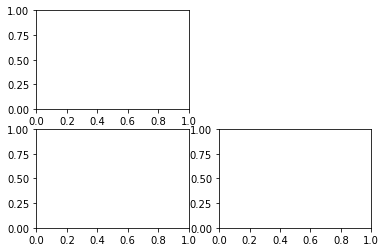

In [15]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
#ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
plt.show()

# ADDING DATA

To generate a line chart within an Axes object, we need to call Axes.plot( ) and pass in the data you want plotted like so:

x_values = [0.0, 0.5, 1.0]

y_values = [10, 20, 40]

ax1.plot(x_values,y_values)

Just like the plt.plot( ), the Axes.plot( ) will accept any iterable object for these parameters, including Numpy arrays and pandas Series objects.

In [16]:
second_twelve = unrate[12:24]
print(second_twelve)

         date  value
12 1949-01-01    4.3
13 1949-02-01    4.7
14 1949-03-01    5.0
15 1949-04-01    5.3
16 1949-05-01    6.1
17 1949-06-01    6.2
18 1949-07-01    6.7
19 1949-08-01    6.8
20 1949-09-01    6.6
21 1949-10-01    7.9
22 1949-11-01    6.4
23 1949-12-01    6.6


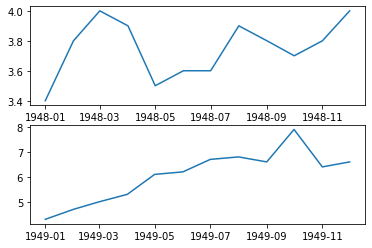

In [17]:
fig = plt.figure()#Create a figure that acts as a conatiner for our plot, instead of calling the pyplot fuction, we assign
#it to a variable fig.
ax1 = fig.add_subplot(2,1,1)#Create an axes instance, to add new subplot to the fig.This returns an axes object.
ax2 = fig.add_subplot(2,1,2)#Add another subplot to the figure. Assign it a variable ax2
ax1.plot(first_twelve["date"], first_twelve["value"])#To generate a line chart, we call the axes.plot and pass in the data
ax2.plot(second_twelve["date"], second_twelve["value"])
plt.show()


# FORMATTING AND SPACING

One issue with the 2 plots is that the x-axis ticks labels are unreadable. The other issue is that the plots are squeezed together vertically and hard to interpret. Even though now we generated 2 line charts, the total plotting area for the figure remained the same. This is because matplotlib used the default dimensions for the total plotting area instead of resizing it to accommodate the plots. If we want to expand the plotting area, we have to specify this ourselves when we create the figure. To tweak the dimensions of the plotting area, we need to use the figsize parameter when we call plt.figure( ). This parameter takes in a tuple of floats:

fig = plt.figure(figsize=(width, height). The unit for width and height is inches. The dpi or dots per inch , and the figsize parameter determine how much space on your display a plot takes. 

Now lets resize our plot in the previous cells

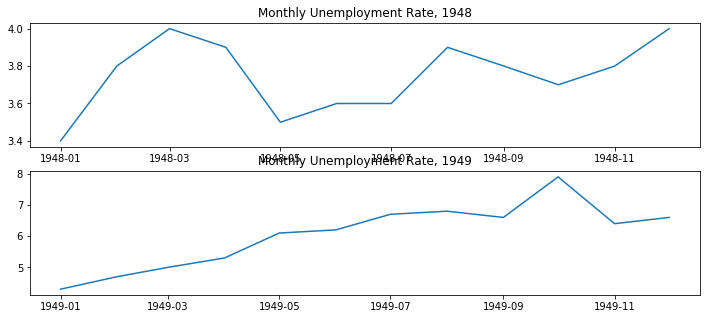

In [18]:
fig = plt.figure(figsize= (12,5))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.plot(first_twelve["date"], first_twelve["value"])
ax2.plot(second_twelve["date"], second_twelve["value"])
ax1.set_title("Monthly Unemployment Rate, 1948")
ax2.set_title("Monthly Unemployment Rate, 1949")
plt.show()

# COMPARING ACROSS MORE YEARS IN OUR DATASET

In the last missin, we were able to extend the size of our plotting area, in order to be able to get a cleareer picture of our labels, titles and the likes. 

Expandong the plotting area horizontally improved the readability of the x-axis labels and minimized the amount of space between the 2 line charts.

Now, we are going to visualize data from a few more years to see if we find any evidence for seasonality between those years. Since we intend analyzing more years in other to observe the seasonality properly, we will have to use loop so that we are not repeating unneccessary code. In order to generate values for the loop, we'll use Python's range()function which produces a list of numbers. 

In [19]:
for i in range(5):#takes an interger argument and produces a sequence of integers starting from zero.
    print(i)

0
1
2
3
4


As an example, we will reproduce the plot in the previous cell, using for loop, this, will prevent us from writing too many codes.

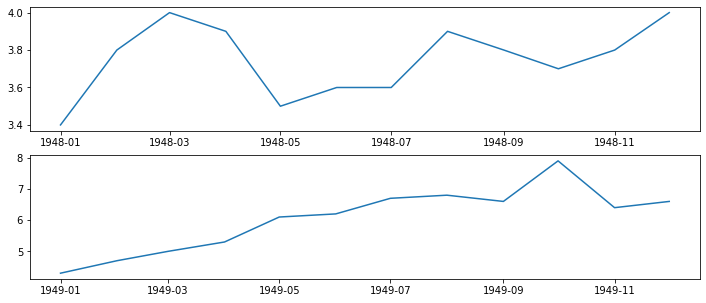

In [20]:
fig = plt.figure(figsize = (12,5))
for i in range(2):
    ax = fig.add_subplot(2,1, i + 1)
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    ax.plot(subset["date"], subset["value"])
plt.show()


We will use this technique to plot five years of data

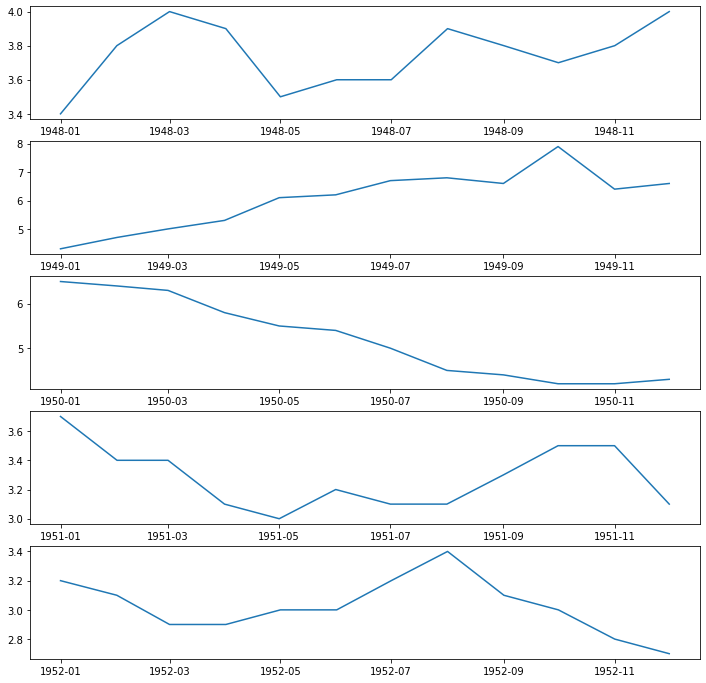

In [21]:
fig = plt.figure(figsize= (12,12))#create a container for the plots assign it to a variable fig
for i in range(5):#iterate through the range 5 to produce a sequence beginning from 0 ending at 4
    ax = fig.add_subplot(5,1,i+1)#create an axis instance that takes in 3 arguments, norow, nocol and the iterable incrementer
    start_index = i*12#specify the start_index
    end_index = (i+1)*12#specify the end_index
    subset = unrate[start_index:end_index]#declare a variable that indexes the slices the start and end index of our dataset
    ax.plot(subset["date"], subset["value"])#
plt.show()


# OVERLAYING LINE CHARTS

By adding more line charts, we can look across more years for seasonal trends. This comes at a cost though. We now have to visualise and scan over space which is a limitation we experienced when scanning the table  representation of the same data.

We can overcome this downside by overlaying the line charts in a single subplot. If we remove the year from the x-axis and just keep the month values, we can use the same x-axis values to plot all of lines. First, we'll explore how to extract just the month values, from the date column and then generate multiple plots on the same coordinate grid.

In [22]:
unrate["month"] = unrate["date"].dt.month#returns a Series, containing interger values for each month
#Now, lest see an example of how to create overlaying line chart

fig= plt.figure(figsize=(6,3))
for i in range(2):
    ax= fig.add_subplot(2,1,i+1)
    start_index = i*12
    end_index = (i+i)*12
    subset = unrate[start_index:end_index]
    ax.plot(subset["month"], subset["value"])
plt.show

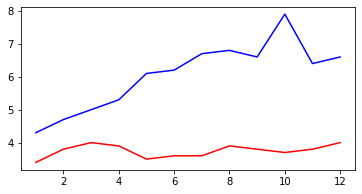

In [23]:
fig = plt.figure(figsize=(6,3))
plt.plot(unrate[0:12]["month"], unrate[0:12]["value"], c ="red")
plt.plot(unrate[12:24]["month"], unrate[12:24]["value"], c = "blue")

plt.show()

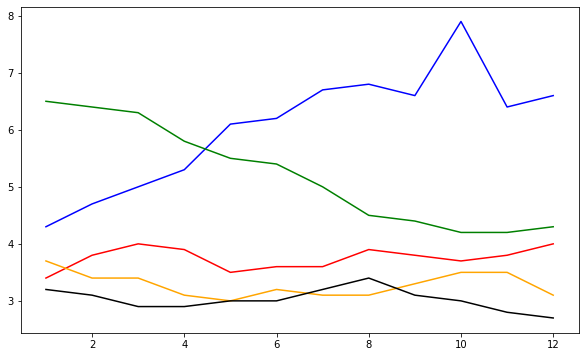

In [24]:
# Now, lets visualize 5 years worth of unemployment rates on the same subplot
fig = plt.figure(figsize=(10,6))
plt.plot(unrate[0:12]["month"], unrate[0:12]["value"], c = "red")
plt.plot(unrate[12:24]["month"], unrate[12:24]["value"], c ="blue")
plt.plot(unrate[24:36]["month"], unrate[24:36]["value"], c ="green")
plt.plot(unrate[36:48]["month"], unrate[36:48]["value"], c ="orange")
plt.plot(unrate[48:60]["month"], unrate[48:60]["value"], c ="black")

plt.show()





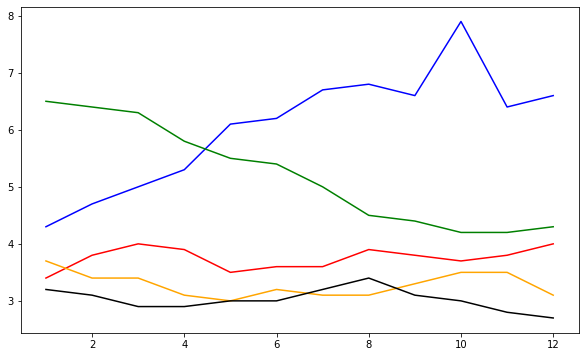

In [25]:
#Lets reproduce this subplot using the loop style we learnt earlier

fig = plt.figure(figsize =(10,6))
colors = ["red", "blue", "green", "orange", "black"]
for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    subset= unrate[start_index:end_index]
    plt.plot(subset["month"], subset["value"], c = colors[i])
    
plt.show()

In [26]:
#colors = ["red", "blue", "green", "orange", "black"]
#for i in range(5):
    #print(colors[i])

# ADDING A LEGEND

By plotting all the lines on one subplot gives an entirely different perspective on the data. The main thing  that sticks out is how the blue and green lines span a larger range of y-values(4% to 8% for blue and 4% to 7% for green. But the issue now is that we dont know which line corresponds to which year, because the x-axis now only reflects the month values. This is where adding a legend becomes pertinent. When we generate each line chart, we need to specify the text label we want each color to link to. The pyplot.plot() function contains label parameter which we can use to set the year value. 

We can create the legend using pyplot.legend and specify its location using the loc parameter:
plt.legend(loc="upper left"). Lets see this work.

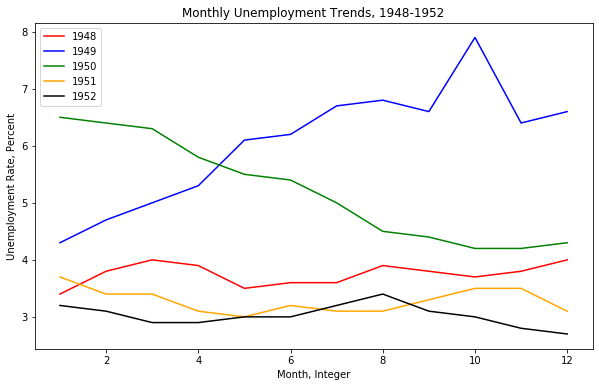

In [27]:
fig = plt.figure(figsize =(10,6))
colors = ["red", "blue", "green", "orange", "black"]
for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    subset= unrate[start_index:end_index]
    #label =str(1948 + i)
    plt.plot(subset["month"], subset["value"], c = colors[i], label = str(1948+i))
plt.title("Monthly Unemployment Trends, 1948-1952")
plt.xlabel("Month, Integer")
plt.ylabel("Unemployment Rate, Percent")
plt.legend(loc = "upper left")   
plt.show()

# BAR PLOTS AND SCATTER PLOTS

In the previous cells and last mission, we explored trends in unemployment data using line charts. The data had 2 columns.

- DATE - monthly time stamp

- VALUE - unemployment rate (in percent)

Line charts were an appropriate choice for analysing/visualizing datasets of such type because the rows had a natural ordering to it. Each row reflected an event that occured after the previous row. Changing the order of the rows would make the line chart inaccurate. The lines from one marker to the next helped emphasize the logical connection between the data points. Now, we will look at a dataset with no particular order.

# INTRODUCTION TO THE DATA

To investigate the potential bias that movie reviews  site have, **FIVETHIRTYEIGHT** compiled data for 147 films from 2015 that have substantive reviews from both critics and consumers. Everytime Hollywood release a movie, critics from **Metacritic**, **Fandango**, **Rotten Tomatoes** and **IMDB** review and rate the film. They also ask users in the various communities to review and rate also. Then they calculate  the average ratings from both critics and users and display then on their site. 

FiveThirtyEight compiled the datset we will use here to investigate if there was any bias to Fadango's ratings. In addition to aggregating ratings for films, Fandango is unique in that it sells movie tickets and so has a directcommercial interest in showing higher ratings. 

After discovering that a few substandard movies got high ratings on Fandango, the FiveThirtyEight team investigated and published an article on bias in movie ratings.

We will be working with the *fandango_scores.csv*. Below is a dictionary of our datset:

- FILM - film name

- RT_user_norm - average user rating from Rotten Tomatoes, normalized to a 1 to 5 point scale

- Metacritic_user_norm - average user rating from Metacritic, nomalized as that of RT

- IMDB_norm - average user rating from IMDB, normalized to a 1 to 5 point scale.

- Fandango_RatingValue - average user rating from  Fandango normalized to a 1 to 5 point scale

- Fandango_Stars - the rating displayed on the fandango website(rounded to the nearest star, 1 to 5 point scale)

In [28]:
import pandas as pd
reviews = pd.read_csv("C:\\Users\\USER\\Videos\\Coding Videos\\my_datasets\\fandango.csv")

In [29]:
reviews

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,4.0,4.0,4.35,3.90,...,3.70,4.5,4.0,3.5,4.0,3.5,33,7367,1348,0.0
142,'71 (2015),97,82,83,7.5,7.2,3.5,3.5,4.85,4.10,...,3.60,5.0,4.0,4.0,4.0,3.5,60,24116,192,0.0
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,3.5,3.5,4.85,3.90,...,3.70,5.0,4.0,4.5,4.5,3.5,123,24345,118,0.0
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,3.5,3.5,5.00,4.05,...,3.90,5.0,4.0,4.5,3.5,4.0,19,1955,59,0.0


In [30]:
# Select the needed columns and assign assign the resulting dataframe to norm_reviews
norm_reviews = reviews[["FILM", "RT_user_norm", "Metacritic_user_nom", "IMDB_norm","Fandango_Ratingvalue", "Fandango_Stars"]]

In [31]:
norm_reviews[:1]#Print the first row of our new dataframe

,FILM,RT_user_norm,Metacritic_user_nom,IMDB_norm,Fandango_Ratingvalue,Fandango_Stars
0,Avengers: Age of Ultron (2015),4.3,3.55,3.9,4.5,5.0


In [32]:
norm_reviews

,FILM,RT_user_norm,Metacritic_user_nom,IMDB_norm,Fandango_Ratingvalue,Fandango_Stars
0,Avengers: Age of Ultron (2015),4.30,3.55,3.90,4.5,5.0
1,Cinderella (2015),4.00,3.75,3.55,4.5,5.0
2,Ant-Man (2015),4.50,4.05,3.90,4.5,5.0
3,Do You Believe? (2015),4.20,2.35,2.70,4.5,5.0
4,Hot Tub Time Machine 2 (2015),1.40,1.70,2.55,3.0,3.5
...,...,...,...,...,...,...
141,Mr. Holmes (2015),3.90,3.95,3.70,4.0,4.0
142,'71 (2015),4.10,3.75,3.60,3.5,3.5
143,"Two Days, One Night (2014)",3.90,4.40,3.70,3.5,3.5
144,Gett: The Trial of Viviane Amsalem (2015),4.05,3.65,3.90,3.5,3.5


In [33]:
#Now, i will love to remane my columns, to python's snakecase.
cols = ["film", "rt_user_norm", "metacritic_user_norm", "imdb_norm", "fandango_ratingv", "fandango_stars"]
norm_reviews.columns = cols

In [34]:
#print the values of the dataframe again, to see if changes have taken effects
norm_reviews

,film,rt_user_norm,metacritic_user_norm,imdb_norm,fandango_ratingv,fandango_stars
0,Avengers: Age of Ultron (2015),4.30,3.55,3.90,4.5,5.0
1,Cinderella (2015),4.00,3.75,3.55,4.5,5.0
2,Ant-Man (2015),4.50,4.05,3.90,4.5,5.0
3,Do You Believe? (2015),4.20,2.35,2.70,4.5,5.0
4,Hot Tub Time Machine 2 (2015),1.40,1.70,2.55,3.0,3.5
...,...,...,...,...,...,...
141,Mr. Holmes (2015),3.90,3.95,3.70,4.0,4.0
142,'71 (2015),4.10,3.75,3.60,3.5,3.5
143,"Two Days, One Night (2014)",3.90,4.40,3.70,3.5,3.5
144,Gett: The Trial of Viviane Amsalem (2015),4.05,3.65,3.90,3.5,3.5


# BAR PLOT

Looking at our initial dataframe (reviews). we observe that the some sites has aggregate values of both reviews from users and reviews from critics, sites like **Rotten Tomatoes** and **Metacritic** has reviews from both user and critic, while the other two sites aggregates only values from users. That is why in our newly created data from, we indexed just the columns related to users ratings average and omitted that of critic. This allows us to compare how users on each site rated a movie.

While using averages isn't perfect because films with a few reviews can skew the average rating. Hence, FiveThirtyEight only selected movies with a non-trivial  number of ratings to ensure films with only handful of ratings aren't included.

While calculating and comparing summary statistics give us hard numbers for quantifying the bias, visualizing the data using plots can help us gain a more intuitive understanding. We need a visualization that scales graphical objects to the quantitative values we're interested in comparing. One of this visualization is a bar plot

A bar plot uses rectangular bars  whose lengths are proportional to the values they represent.

An effective bar plot uses categorical values on one axis and numerical values on the other axis. It also has consistent width for each bar

If the x- axis contains the categorical values and the rectangular bars are scaled vertically, this known as a verical bar plot.

A horizontal bar plot flips the axes, which is useful for quick spotting of the largest values.

To create  a vertical bar plot, we need to specify the positions of the bar, the width of the bar and the positions of the axis labels.

We can generate a vertical bar plot using either pyplot.bar() or Axes.bar()
Using the axes.bar() will help us in customisation.
The axes.bar() has two required parameter left and height. We use the left parameter to specify the x coordinates of the left side of the bar
The height parameter is used  to specify the height of each bar. Both of this parameters accept a list like object.

The np.arange function returns evenly spaced values. We use arange() to generate the positions of the left side of the bars.. It requires a parameter that specifies the number of values we want to generate.

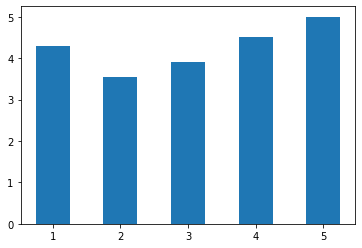

In [35]:
#fig = plt.figure()
#ax = fig.add_subplot()
#Positions of the left sides of the bars.[0.75,1.75,2.75,3.75,4.75]
from numpy import arange
bar_positions = arange(5) + 1
#Heights of bars, in this case, the average rating for the first movie in the dataset.

num_cols = ["rt_user_norm", "metacritic_user_norm", "imdb_norm", "fandango_ratingv", "fandango_stars"]
bar_heights = norm_reviews[num_cols].iloc[0].values#our newly created df indexes the specified columns and graphs out the
#can use to plot information on the first row. The values takes the information in the row and turns it into an array  
#that matplotlib the heights of each bar
fig, ax = plt.subplots()

ax.bar(bar_positions, bar_heights, 0.5)
plt.show()

By default, matplotlib sets the x-axis tick labels to the interger values the bars spanned on the x-axis. Now, we will align the axis and labels. We can use the Axes.set_xticks() to change ticks position. And then we can use the Axes.set_xtickslabels() to specify tick labels

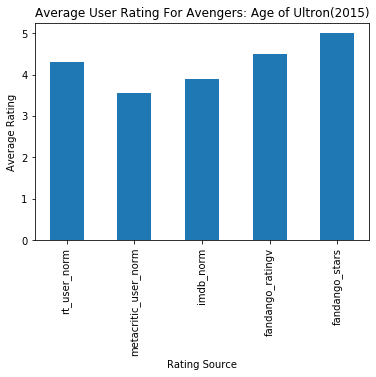

In [36]:
import matplotlib.pyplot as plt
from numpy import arange
fig,ax = plt.subplots()
bar_positions = arange(5)
num_cols = ["rt_user_norm", "metacritic_user_norm", "imdb_norm", "fandango_ratingv", "fandango_stars"]
bar_heights = norm_reviews[num_cols].iloc[0].values
ax.bar(bar_positions, bar_heights, 0.5)
ax.set_xticks(bar_positions)
ax.set_xticklabels(num_cols, rotation = 90)
ax.set_xlabel("Rating Source")
ax.set_ylabel("Average Rating")
ax.set_title("Average User Rating For Avengers: Age of Ultron(2015)")
plt.show()

# HORIZONTAL BAR PLOT

 We have been creating a vertical bar plot because the categorical data has been lying on the x-axis, now we want to create a horizontal bar plot, one in which the rectangular bars are scaled up horizontally while sitting on the vertical axis.
 
 To do this, instead of using the Axes.bar() method, we will use Axes.hbar(). This method just like the first takes 2 required but different parameter, bottom and width.
 
 We use the bottom parameter to specify the y-coordinate for the bottom sides for the bars and the width parameter to specify the lengths of the bars.

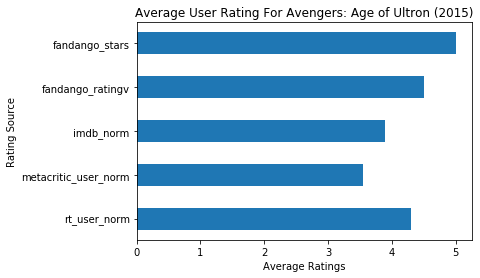

In [37]:
#Now lets try to recreate a horizontal bar plot from our previous sample.
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
bar_bottom = np.arange(5)
num_cols = ["rt_user_norm", "metacritic_user_norm", "imdb_norm", "fandango_ratingv", "fandango_stars"]
bar_width = norm_reviews[num_cols].iloc[0].values
ax.barh(bar_bottom, bar_width, 0.5)
ax.set_yticks(bar_bottom)
ax.set_yticklabels(num_cols)
ax.set_title("Average User Rating For Avengers: Age of Ultron (2015)")
ax.set_xlabel("Average Ratings")
ax.set_ylabel("Rating Source")
plt.show()



From both our plots, we can ascertain that the 2 average scores from fandango users are higher than those from other sites for that particular movie or film

# GROUPED BAR CHART

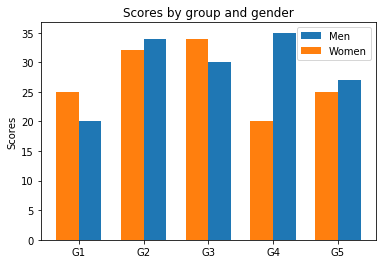

In [38]:
labels = ["G1", "G2", "G3", "G4", "G5"]
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]
import numpy as np
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x + width/2, men_means, width, label = "Men")
rects2 = ax.bar(x - width/2, women_means, width, label = "Women")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel("Scores")
ax.set_title("Scores by group and gender")
ax.legend()

#def autolabel(rects):
    #Attach a text label above each bar in *rects* displaying its height
    #for rect in rects:
        #height = rect.get_height()
        #ax.annotate("{}".formaimot(height),
                    #xy = (rect.get_x()+ rect.get_width() / 2, height),
                    #xytext = (0, 3), #3 points vertical offset
                    #textcoords = "offset points",
                    #ha = "center", va = "bottom")
#autolabel(rects1)
#autolabel(rects2)

#fig.tight_layout()
plt.show()


# SCATTER PLOTS

While bar plots are good at helping us visualize few data points to quickly compare them, they fail at visualizing many data points.

Recall that in line plot, we used lines to connect markers from left to right. This helped to show trend up and down between each points we scanned visually from left to right. Instead of using lines to connect markers, how about leaving the lines like that. A plot containing just markers is known as a **SCATTER PLOT.**

A scatter plot helps to show correlation between 2 columns, if weakly or strongly related. While calculating correlation coefficent gives a single value precise number, a scatter plot helps us find outliers, gain a more  intuitive sense of how spread out the data is and compare more easily.

To generate a scatter plot, we use the Axes.scatter() method . The scatter method has 2 parameters, x and y, which matches the parameters of the plot() method. The values for these parameters need to be iterable objects of matching lengths(lists, Numpy arrays or Pandas series.)

Lets start by creating a scatter plot that visualizes the relationship between the Fandango_Ratingv and Rt_user_norm columns. We're are looking for a weak correlation between the columns.

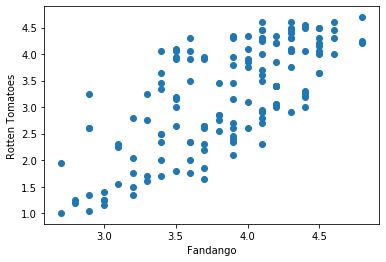

In [39]:
fig,ax = plt.subplots()
ax.scatter(norm_reviews["fandango_ratingv"],norm_reviews["rt_user_norm"])
ax.set_xlabel("Fandango")
ax.set_ylabel("Rotten Tomatoes")
plt.show()

From our scatter plot plot above, we can tell there's a weak, positive correlation between the user ratings on Fandango and the user ratings on Rotten Tomatoes. The correlation is weak beacause for many values of x, there are multiple corresponding y values. It is positive because as x increases, y also increases. In scatter plots, the result gotten is independent on the position of the variables.

# SWITCHING AXES

But if you want to know how an independent variable affects a dependent variable, you may want to put the the independent one on the x-axis and the dependent on on the y-axis. Doing so helps emphasize potential cause and effect realtion.

In our first example, we were not exploring the ratings of both variable to see if one influences or is dependent on the other, instead we were trying to understand how much they agree. Now, lets flip the columns to see dependence.

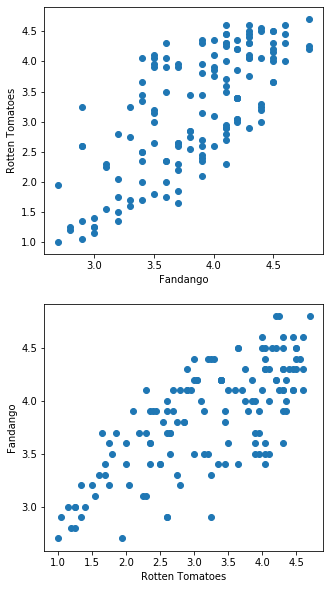

In [40]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (5,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.scatter(norm_reviews["fandango_ratingv"], norm_reviews["rt_user_norm"])
ax1.set_xlabel("Fandango")
ax1.set_ylabel("Rotten Tomatoes")

ax2.scatter(norm_reviews["rt_user_norm"], norm_reviews["fandango_ratingv"])
ax2.set_xlabel("Rotten Tomatoes")
ax2.set_ylabel("Fandango")
plt.show()


# BENCHMARKING CORRELATION

The second scatter plot is a mirror image of the first, both shows a weak correlation.

Now, lets generate scatter plots to see how Fandango  ratings correlate with all 3 of the other review sites. However, it is important to know that when generating multiple scatter plots for comparison purpose, it is important that all plots share the same ranges in x- axis and y- axis. In our previous example, the ranges of the plots generated didn't match.

We can set ranges for each axes by using the Axes.set_ylim() and Axes.set_xlim(). By setting limits  range, we are making sure our comparison is done right and accurately. Now, lets do our comparison.



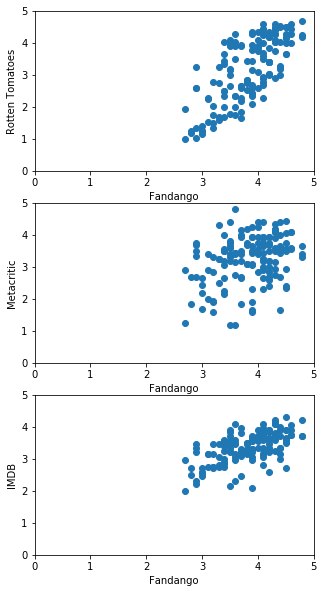

In [41]:
fig = plt.figure(figsize= (5,10))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)
ax1.scatter(norm_reviews["fandango_ratingv"], norm_reviews["rt_user_norm"])
ax1.set_xlabel("Fandango")
ax1.set_ylabel("Rotten Tomatoes")
ax1.set_xlim(0,5)
ax1.set_ylim(0,5)

ax2.scatter(norm_reviews["fandango_ratingv"], norm_reviews["metacritic_user_norm"])
ax2.set_xlabel("Fandango")
ax2.set_ylabel("Metacritic")
ax2.set_xlim(0,5)
ax2.set_ylim(0,5)

ax3.scatter(norm_reviews["fandango_ratingv"], norm_reviews["imdb_norm"])
ax3.set_xlabel("Fandango")
ax3.set_ylabel("IMDB")
ax3.set_xlim(0,5)
ax3.set_ylim(0,5)

plt.show()



From the plots, we can conclude that user ratings from Metacritic and Rotten Tomatoes span a larger range of values than those from IMDB or Fandango. User ratings from Metacritic and Rotten Tomatoes range from 1 to 5. User  ratings from Fandango range approximately from 2.5 to 5. While IMDB range approximately from 2 to 4.5.

Unfortunately, scatter plots give us only a superficial understanding  of the distribution of user ratings from each review site. To get a much better understanding, we will consider yet another two types of plots.

# HISTOGRAMS AND BOX PLOTS

Let's compare the frequency distribution of user ratings from Fandango with those from IMDB using tables. A column's frequency distribution consists of the unique values in that column along with the count for each of those values(or their frequency). We can use Series.value_counts( ) to return the frequency distribution as Series object.

In [42]:
freq_counts = norm_reviews["fandango_ratingv"].value_counts()
print(freq_counts)

4.1    16
4.2    12
3.9    12
4.3    11
3.7     9
3.5     9
4.5     9
3.4     9
3.6     8
4.4     7
4.0     7
3.2     5
2.9     5
3.8     5
3.3     4
4.6     4
3.0     4
4.8     3
3.1     3
2.8     2
2.7     2
Name: fandango_ratingv, dtype: int64


While this ordering is helpful when trying to look for the most common values in a given column, it fails when trying to understand the range that the values in the column span. Now, to get that, we will use Series.sort_index( ) to sort the frequency distribution in ascending order by the values in the column.

In [43]:
freq_counts.sort_index()#Now, we have an idea of the frequency distribution of the values in the fandango column
#We can see that the fandango values ranges from 2.7 to 4.8

2.7     2
2.8     2
2.9     5
3.0     4
3.1     3
3.2     5
3.3     4
3.4     9
3.5     9
3.6     8
3.7     9
3.8     5
3.9    12
4.0     7
4.1    16
4.2    12
4.3    11
4.4     7
4.5     9
4.6     4
4.8     3
Name: fandango_ratingv, dtype: int64

In [44]:
norm_reviews["imdb_norm"].value_counts().sort_index()# The values of imdb ranges from 2.00 to 4.30

2.00     1
2.10     1
2.15     1
2.20     1
2.30     2
2.45     2
2.50     1
2.55     1
2.60     2
2.70     4
2.75     5
2.80     2
2.85     1
2.90     1
2.95     3
3.00     2
3.05     4
3.10     1
3.15     9
3.20     6
3.25     4
3.30     9
3.35     7
3.40     1
3.45     7
3.50     4
3.55     7
3.60    10
3.65     5
3.70     8
3.75     6
3.80     3
3.85     4
3.90     9
3.95     2
4.00     1
4.05     1
4.10     4
4.15     1
4.20     2
4.30     1
Name: imdb_norm, dtype: int64

While we can quickly determine both the maximum and minimum values, we struggle to answer the following questions

- What percent of the ratings are contained in the 2.0 to 4.0 range
    - How does this compare to other sites?
    
- Which values represent the top 25% of the ratings? The bottom 25%?
    - How does this compare with other sites

It is sometimes difficult to compare frequency distribution when the compared objects have different number of values, take for example the 2 columns we explored, the fandango column has 21 unique values while imdb column contains 41 unique values. We hence need a way to compare frequencies  across a shared set of values. 

Because all the ratings have been normalized to a range of 0 to 5, we can start by dividing the range of possible values into a series of fixed length intervals called bins.

We can then sum the frequencies for the values that fall into each bin.

Once this is done, the  distributions for both of these columns are now easier to compare because of the shared x-axis(the bins). We can now plot the bins along the frequency sums as a bar plot. This type of plot is known as **HISTOGRAM**

We can generate a histogram using Axes.hist() mthod. This method takes only 1 required parameter, an iterable object containing the values we want a histogram for. By default, the matplotlib will:

- calculate the minimum and maximum value from the sequence of values we passed in

- create 10 bins of equal length that span the range from the minimum to the maximum value

- group values into the bins

- sum up the associated unique values

- generate a bar for the frequency sum for each bin

While histograms and bar plots are almost the same, they have some dissimilarities. Histograms helps use to visual continuous values using bins while bar plots help us to visualize discrete values. The locations of the bars on the x-axis matter in a histogram unlike the bar plot. Lastly, bar plots also have gaps between the bars, to emphasize that the values are discrete

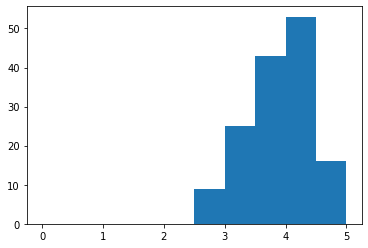

In [45]:
fig, ax = plt.subplots()#Crete a single subplot and assign the returned figure object to fig and 
#the returned axes object to ax
ax.hist(norm_reviews["fandango_ratingv"], range = (0,5))
plt.show()

Recall that one of the questions we were looking to answer for was:

- What percent of the ratings are contained in the 2.0 to 4.0 range .

From the diagram above, we can visually examine the proportional area that the bars in the 2.0 to 4.0 range take up and determine that more than 50% of the movies on the Fandango fall in this range.

Now, lets generate histograms using 20 bins for all four columns. We will set y lims  to ensure the scales for the y-axis are the same.

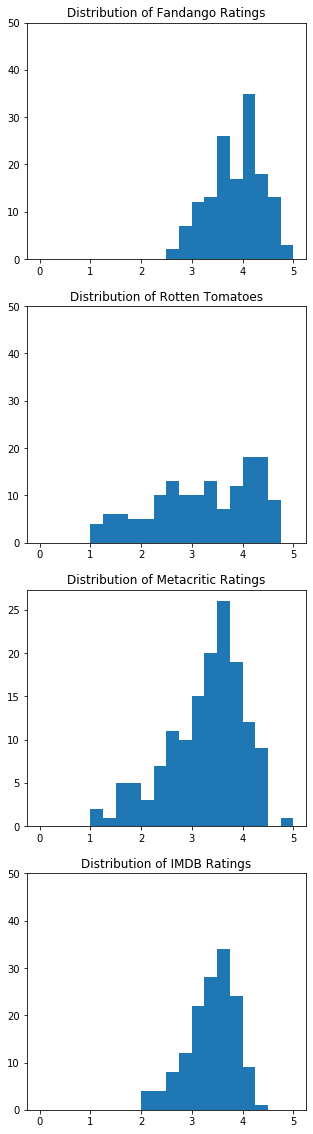

In [46]:
fig = plt.figure(figsize = (5,20))
ax1 = fig.add_subplot(4, 1, 1)
ax2 = fig.add_subplot(4, 1, 2)
ax3 = fig.add_subplot(4, 1, 3)
ax4 = fig.add_subplot(4, 1, 4)

ax1.hist(norm_reviews["fandango_ratingv"], 20, range =(0,5))
ax1.set_title("Distribution of Fandango Ratings")
ax1.set_ylim(0,50)

ax2.hist(norm_reviews["rt_user_norm"], 20, range = (0,5))
ax2.set_title("Distribution of Rotten Tomatoes")
ax2.set_ylim(0,50)

ax3.hist(norm_reviews["metacritic_user_norm"], 20, range =(0,5))
ax3.set_title("Distribution of Metacritic Ratings")
ax2.set_ylim(0,50)

ax4.hist(norm_reviews["imdb_norm"], 20, range=(0,5))
ax4.set_title("Distribution of IMDB Ratings")
ax4.set_ylim(0,50)
plt.show()



From the histogram, we make the folowing observations:

- Around 50% user ratings from Fandango fall in 2 to 4 score range

- Around 50 % of user ratings from Rotten Tomatoes fall in 2 to 4 score range

- Around  75% of the user ratings from Metacrictic fall in the 2 to 4 score range

- Around 90% of the user ratings from IMDB fall in the 2 to 4 score range.

While histogram enables us to visually estimate the percentage of ratings that fall into a range of bins, they dont allow us  to easily understand the top 25% or bottom 25% of the ratings differ across the sites. The top and bottom 25% of values both represent quartiles. To visualize quartile, we need box plots.

# BOX PLOTS

A box plot consists of box and whisker diagrams, which represents the different quartiles in a visual way.

The two region contained within the box in the middle make up the interquartile range or IQR. The IQR is used to measure dispersion of the values. The ratio of the length of the box to the whiskers around the box helps us to understand how values in the distribution are spread out. We can generate boxplot using Axes.boxplot( ).

ax.boxplot(norm_reviews["RT_user_norm"]).

Now lets create a box diagram for the Rotten Tomatoes user ratings.

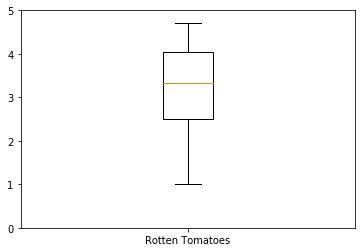

In [47]:
fig, ax = plt.subplots()
ax.boxplot(norm_reviews["rt_user_norm"])
ax.set_xticklabels(["Rotten Tomatoes"])
ax.set_ylim(0,5)
plt.show()

From the box plot generated for Rotten Tomatoes user ratings above, we can conclude that:

- the bottom 25% of user ratings range from around 1 to 2.5

- the top 25% of user ratings rangr from around 4 to 4.6.

To compare the lower and upper ranges with those for the other columns, we need to generate multiple box and whisker diagrams in the same box plot. When selecting multiple columns to pass in the Axes.boxplot( ), we need to use the values accessor to return a multi dimensionsal numpy array. Like so

ax.boxplot(norm_reviews[num_cols].values), where num_cols is the variable that carries the list of rows of our norm_review df.

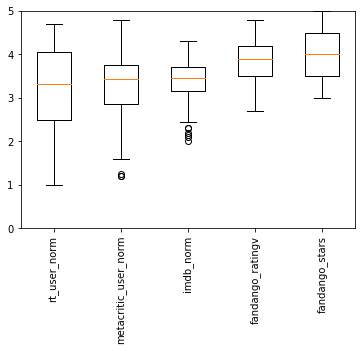

In [48]:
num_cols = ["rt_user_norm", "metacritic_user_norm", "imdb_norm", "fandango_ratingv", "fandango_stars"]
fig,ax = plt.subplots()
ax.boxplot(norm_reviews[num_cols].values)
ax.set_xticklabels(num_cols, rotation = 90)
ax.set_ylim(0,5)
plt.show()

From the box-plot generate for multiple columns,  we can reach the following conclusions:

- user rating from Rotten Tomatoes and Metacritic span a larger range of values

- user ratings from IMDB and Fandango are both skewed in the positive direction and span a more constrained range of values.

If you observe closely, you will notice there are a couple of user ratings from both Metacritic and IMDB that are just beyond the boxplot's whiskers. These values are called outliers or extreme values. Outliers are usually  treated as abnormal values and affect the overall observation of the dataset due to their very high or low values.